In [1]:
from numpy import *
import matplotlib.pyplot as plt
import pandas as pd

# 加载本地数据
def loadDataSet(fileName):
    origin = pd.read_csv(fileName)
    origin = pd.get_dummies(origin)
    dataSet = origin.values
    return dataSet
 
# 欧式距离计算
def distEclud(vecA, vecB):
    return sqrt(sum(power(vecA - vecB, 2))) # 格式相同的两个向量做运算
 
# 中心点生成 随机生成最小到最大值之间的值
def randCent(dataSet, k):
    n = shape(dataSet)[1]
    centroids = mat(zeros((k,n))) # 创建中心点，由于需要与数据向量做运算，所以每个中心点与数据得格式应该一致（特征列）
    for j in range(n):  # 循环所有特征列，获得每个中心点该列的随机值
        minJ = min(dataSet[:,j])
        rangeJ = float(max(dataSet[:,j]) - minJ)
        centroids[:,j] = mat(minJ + rangeJ * random.rand(k,1)) # 获得每列的随机值 一列一列生成
    return centroids
 
# 返回 中心点矩阵和聚类信息
def kMeans(dataSet, k):
    m = shape(dataSet)[0]
    clusterAssment = mat(zeros((m,2))) # 创建一个矩阵用于记录该样本 （所属中心点 与该点距离）
    centroids = randCent(dataSet, k)
    clusterChanged = True
    while clusterChanged:
        clusterChanged = False  # 如果没有点更新则为退出
        for i in range(m):
            minDist = inf; minIndex = -1
            for j in range(k):  # 每个样本点需要与 所有 的中心点作比较
                distJI = distEclud(centroids[j,:],dataSet[i,:])  # 距离计算
                if distJI < minDist:
                    minDist = distJI; minIndex = j
            if clusterAssment[i,0] != minIndex: # 若记录矩阵的i样本的所属中心点更新，则为True，while下次继续循环更新
                clusterChanged = True
            clusterAssment[i,:] = minIndex,minDist**2   # 记录该点的两个信息
        # print(centroids)
        for cent in range(k): # 重新计算中心点
            # print(dataSet[nonzero(clusterAssment[:,0] == cent)[0]]) # nonzero返回True样本的下标
            ptsInClust = dataSet[nonzero(clusterAssment[:,0].A==cent)[0]] # 得到属于该中心点的所有样本数据
            centroids[cent,:] = mean(ptsInClust, axis=0) # 求每列的均值替换原来的中心点
    return centroids, clusterAssment

X = loadDataSet('DRUG1n.csv')
datMat = mat(loadDataSet('DRUG1n.csv'))
myCentroids,clustAssing = kMeans(datMat,7)
print(myCentroids)
print(clustAssing)
 


[[  5.80294118e+01   6.99041971e-01   4.87800588e-02   5.00000000e-01
    5.00000000e-01   3.52941176e-01   2.94117647e-01   3.52941176e-01
    7.05882353e-01   2.94117647e-01   0.00000000e+00   2.35294118e-01
    5.88235294e-02   2.35294118e-01   4.70588235e-01]
 [  6.88181818e+01   7.34344212e-01   5.43103030e-02   3.93939394e-01
    6.06060606e-01   3.93939394e-01   3.33333333e-01   2.72727273e-01
    4.84848485e-01   5.15151515e-01   0.00000000e+00   2.12121212e-01
    6.06060606e-02   2.72727273e-01   4.54545455e-01]
 [  3.80555556e+01   6.87709944e-01   4.76571667e-02   5.55555556e-01
    4.44444444e-01   3.61111111e-01   4.16666667e-01   2.22222222e-01
    3.88888889e-01   6.11111111e-01   1.66666667e-01   0.00000000e+00
    2.77777778e-02   2.77777778e-01   5.27777778e-01]
 [  1.68333333e+01   6.70431500e-01   4.46530833e-02   5.83333333e-01
    4.16666667e-01   6.66666667e-01   8.33333333e-02   2.50000000e-01
    3.33333333e-01   6.66666667e-01   8.33333333e-02   0.00000000e+0

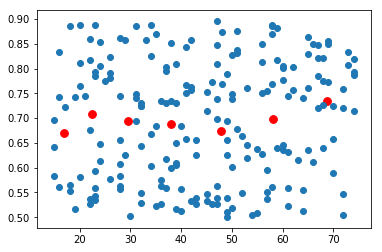

In [2]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(myCentroids[:,0].flatten().A[0],myCentroids[:,1].flatten().A[0],color='r',s=60)
ax.scatter(datMat[:,0].flatten().A[0],datMat[:,1].flatten().A[0])
plt.show()

In [3]:
a = array(clustAssing)

In [4]:
b = []
for i in range(a.shape[0]):
    b.append(a[i][0])

In [5]:
b = array(b)

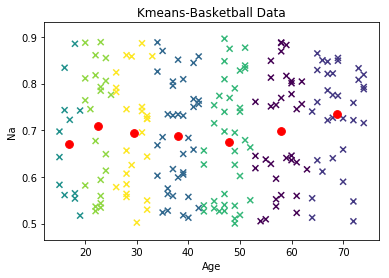

In [6]:
x1 = [n[0] for n in X]
x2 = [n[1] for n in X]
x3 = [n[2] for n in X]
# 绘制散点图 参数：x横轴 y纵轴 c=y_pred聚类预测结果 marker类型 o表示圆点 *表示星型 x表示点
plt.scatter(x1, x2, c=b, marker='x')
plt.scatter(myCentroids[:,0].flatten().A[0],myCentroids[:,1].flatten().A[0],color='r',s=60)
# 绘制标题
plt.title("Kmeans-Basketball Data")

# 绘制x轴和y轴坐标
plt.xlabel("Age")
plt.ylabel("Na")

# 显示图形
plt.show()

In [7]:
from numpy import *
import matplotlib.pyplot as plt
import pandas as pd


fileName = 'DRUG1n.csv'
origin = pd.read_csv(fileName)
origin = pd.get_dummies(origin)
dataSet = origin.values

In [8]:
n = shape(dataSet)[1]
n

15

In [9]:
centroids = mat(zeros((5,n))) # 创建中心点，由于需要与数据向量做运算，所以每个中心点与数据得格式应该一致（特征列）
centroids


matrix([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.]])

In [10]:
for j in range(n):  # 循环所有特征列，获得每个中心点该列的随机值
    print("number ",j)
    minJ = min(dataSet[:,j])
    print(minJ)
    rangeJ = float(max(dataSet[:,j]) - minJ)
    print(rangeJ)
    centroids[:,j] = mat(minJ + rangeJ * random.rand(5,1)) # 获得每列的随机值 一列一列生成
    print(centroids)
    print("\n")

number  0
15.0
59.0
[[ 71.30746346   0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.           0.
    0.           0.           0.        ]
 [ 35.13585636   0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.           0.
    0.           0.           0.        ]
 [ 57.60061779   0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.           0.
    0.           0.           0.        ]
 [ 35.3290288    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.           0.
    0.           0.           0.        ]
 [ 66.85879434   0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.           0.
    0.           0.           0.        ]]


number  1
0.500169
0.395887
[[ 71.30746346   0.

In [11]:
clustAssing = array(clustAssing)

In [12]:
sqrt(clustAssing[:,1].dot(clustAssing[:,1].T))/len(clustAssing)

0.78774308907541823